## Analyze CC from raw ABF Files

## User Input

In [2]:
dir_in = r'\Projects\All Olive\Coupling\ABF'
file_in = '2019_08_08_0019.abf'
dir_out = dir_in + '\\Analyzed'
ignore = list([13,117,65,111,9,8,87, 75, 71,101,121, 43, 147])    

## Import Packages

In [3]:
import pyabf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Import abf files

In [4]:
os.chdir (dir_in)
abf = pyabf.ABF(file_in)   

## Declare variables

In [5]:
sweeps = abf.sweepList
included1 = list()
included2 = list()
count1 = list()
count2 = list()
sensitivity = 0.5

sf = abf.dataPointsPerMs # Scale factor for reading the raw data into the graph (in ms - must be integer)
sf_s = abf.dataPointsPerMs * 1000 # Scale factor for setting "cursors" in the graph (in seconds)
base_start1 = 0
base_end1 = 50 * sf
hyp_start1 = 172 * sf
hyp_end1 = 272 * sf
trace_end1 = 450 * sf

base_start2 = 967 * sf
base_end2 = 1067 * sf
hyp_start2 = 1120 * sf
hyp_end2 = 1220 * sf
trace_end2 = 1500 * sf

means1 = list()
means2 = list()
mean1 = np.nan
mean2 = np.nan

i = 0
for sweep in sweeps:
    # mean of baselines for each channel
    if sweep in ignore:
        pass
    else:
        # Get X and Y data for this sweep on Ch1
        abf.setSweep (sweepNumber = sweep, channel = 0) 
        means1.append(abf.sweepY [base_start1:base_end1])
        #means1.append(abf.sweepY [(500 * sf):(1500 * sf)])
    
        # Get X and Y data for this sweep on Ch2
        abf.setSweep (sweepNumber = sweep, channel = 2) 
        means2.append(abf.sweepY [base_start2:base_end2])
        #means2.append(abf.sweepY [(0 * sf):(1000 * sf)])

    i = i + 1

mean1 = np.mean(means1)
mean2 = np.mean(means2)





## Filter Sweeps

In [6]:

i = 0

for sweep in sweeps:
    
    # Is it in the ignore list?
    if sweep in ignore: 
        pass
    
    # Proceed to analysis
    else:
        
        # Get X and Y data for this sweep on Ch1
        abf.setSweep (sweepNumber = sweep, channel = 0) 
        
        # Get values for region 1 cell 1 baseline region
        x1 = abf.sweepX [base_start1:trace_end1]
        y1 = abf.sweepY [base_start1:trace_end1]
        x_base1 = abf.sweepX [base_start1:base_end1]
        y_base1 = abf.sweepY [base_start1:base_end1]
        y_base_mean1 = np.mean(y_base1)
        y_base_max1 = max(y_base1)
        y_base_min1 = min(y_base1)
        
        # Get values for Region 2 cell 1 baseline region
        x3 = abf.sweepX [base_start2:trace_end2]
        y3 = abf.sweepY [base_start2:trace_end2]
        x_base3 = abf.sweepX [base_start2:base_end2]
        y_base3 = abf.sweepY [base_start2:base_end2]
        y_base_mean3 = np.mean(y_base3)
        y_base_max3 = max(y_base3)
        y_base_min3 = min(y_base3)
        
        # Get values for Region 1 cell 1 hyperpolarizing region    
        x_hyp1 = abf.sweepX [hyp_start1:hyp_end1]
        y_hyp1 = abf.sweepY [hyp_start1:hyp_end1]
        y_hyp_mean1 = np.mean(y_hyp1)
        y_hyp_max1 = max(y_hyp1)
        y_hyp_min1 = min(y_hyp1)
        
        # Get values for Region 1 cell 2 hyperpolarizing region    
        x_hyp3 = abf.sweepX [hyp_start2:hyp_end2]
        y_hyp3 = abf.sweepY [hyp_start2:hyp_end2]
        y_hyp_mean3 = np.mean(y_hyp3)
        y_hyp_max3 = max(y_hyp3)
        y_hyp_min3 = min(y_hyp3)
        
        # Get X and Y data for this sweep on Ch1
        abf.setSweep (sweepNumber = sweep, channel = 2) 
            
        # Get values for Region 1 cell 2 baseline region
        x2 = abf.sweepX [base_start1:trace_end1]
        y2 = abf.sweepY [base_start1:trace_end1]
        x_base2 = abf.sweepX [base_start1:base_end1]
        y_base2 = abf.sweepY [base_start1:base_end1]
        y_base_mean2 = np.mean(y_base2)
        y_base_max2 = max(y_base2)
        y_base_min2 = min(y_base2)
        
        # Get values fpr Region 2 cell 2 baseline region
        x4 = abf.sweepX [base_start2:trace_end2]
        y4 = abf.sweepY [base_start2:trace_end2]
        x_base4 = abf.sweepX [base_start2:base_end2]
        y_base4 = abf.sweepY [base_start2:base_end2]
        y_base_mean4 = np.mean(y_base4)
        y_base_max4 = max(y_base4)
        y_base_min4 = min(y_base4)
        
        # Get values for cell 2 hyperpolarizing region
        x_hyp2 = abf.sweepX [hyp_start1:hyp_end1]
        y_hyp2 = abf.sweepY [hyp_start1:hyp_end1]
        y_hyp_mean2 = np.mean(y_hyp2)
        y_hyp_max2 = max(y_hyp2)
        y_hyp_min2 = min(y_hyp2) 
        
        # Get values for cell 2 hyperpolarizing region
        x_hyp4 = abf.sweepX [hyp_start2:hyp_end2]
        y_hyp4 = abf.sweepY [hyp_start2:hyp_end2]
        y_hyp_mean4 = np.mean(y_hyp4)
        y_hyp_max4 = max(y_hyp4)
        y_hyp_min4 = min(y_hyp4)  
        
        
        # Is cell 1 healthy?
        if y_base_mean1 > -30: 
            ignore.append (sweep)
            print ('Sweep #' + str(sweep) + ' removed: Vm exceeded - 30 mV on Cell 1(' + str(base_mean1) + ')' )
                
        # Is cell 2 healthy?
        elif y_base_mean2 > -30: 
            ignore.append (sweep)
            print ('Sweep #' + str(sweep) + ' removed: Vm exceeded - 30 mV on Cell 2')
        
        # Filter 1 --> 2 connections
        if sweep % 2 == 0 and sweep not in ignore:
        
            # Is there a spike in the baseline of Region 1 cell 1?
            if y_base_min1 < mean1 + (mean1 * sensitivity) or y_base_max1 > mean1 - (mean1 * sensitivity) :
                ignore.append(sweep)
                display(HTML('Sweep #' + str(sweep) + ' removed: Vm changed more than 25% on Region 1 Cell 1'))
            
            # Is there a spike in the baseline of Region 1 cell 2
            elif y_base_min2 < mean2 + (mean2 * sensitivity) or y_base_max2 > mean2 - (mean2 * sensitivity) :
                ignore.append(sweep)
                display(HTML('Sweep #' + str(sweep) + ' removed: Vm changed more than 25% on Region 1 Cell 2')) 
            
            # Is there a spike in the hyperpolarizing of Region 1 cell 2
            elif y_hyp_min2 < y_base_mean2 + (y_base_mean2 * (sensitivity)) or y_hyp_max2 > y_base_mean2 - (y_base_mean2 * (sensitivity)) :
                ignore.append(sweep)
                display(HTML('Sweep #' + str(sweep) + ' removed: Spike in hyperpolarization in Region 1 Cell 2')) 
                
            else:
                included1.append (sweep)
                count1.append(i)
                
        # Filter 2 -> 1 connection        
        elif sweep % 2 != 0 and sweep not in ignore: 
            #included2.append (sweep)
            # Is there a spike in the baseline of Region 2 cell 1?
            if y_base_min3 < mean1 + (mean1 * sensitivity) or y_base_max3 > mean1 - (mean1 * sensitivity) :
                ignore.append(sweep)
                display(HTML('Sweep #' + str(sweep) + ' removed: Vm changed more than 25% on Region 2 Cell 1') )
            
            # Is there a spike in the baseline of Region 2 cell 2
            #elif y_base_min4 < mean2 + (mean2 * sensitivity) or y_base_max4 > mean2 - (mean2 * sensitivity) :
                #ignore.append(sweep)
                #display(HTML('Sweep #' + str(sweep) + ' removed: Vm changed more than 25% on Region 2 Cell 2') )
               # print(y_base_min4,  mean2 + (mean2 * sensitivity), y_base_max4, mean2 - (mean2 * sensitivity))
            
            # Is there a spike in the hyperpolarizing of Region 2 cell 1
            elif y_hyp_min3 < mean1 + (mean1 * (sensitivity)) or y_hyp_max3 > mean1 - (mean1 * (sensitivity)) :
                ignore.append(sweep)
                display(HTML('Sweep #' + str(sweep) + ' removed: Spike in hyperpolarization in Region 2 Cell 1') )
            
            else:
                included2.append (sweep)
                count2.append(i)
    i = i + 1
    
df_filter = pd.DataFrame ({'Filter': ['# Analyzed'], 
                           'Odd Sweep Numbers': [len(included1)],
                           'Even Sweep Numbers': [len(included2)]})

display(HTML(df_filter.to_html()))

,Filter,Odd Sweep Numbers,Even Sweep Numbers
0,# Analyzed,85,74


## Connections 1--> 2

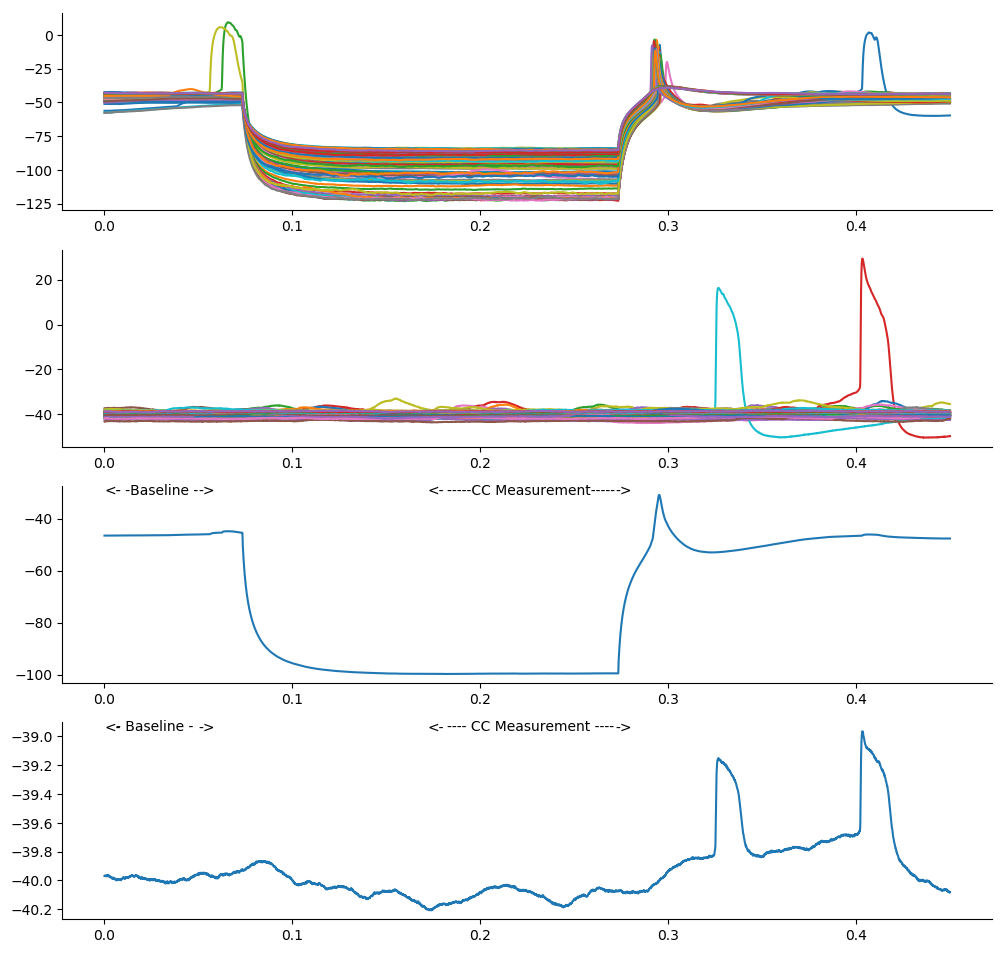

In [16]:
df1x = pd.DataFrame()
df1y = pd.DataFrame()
df2x = pd.DataFrame()
df2y = pd.DataFrame()
dfcmdx = pd.DataFrame()
dfcmdy = pd.DataFrame()
df_out = pd.DataFrame()
# print (included1)

file_out = file_in.replace('.abf','') + '_1-2_.csv' 

i = 0
fig, ax = plt.subplots(4,1, figsize=(12, 12), dpi = 100)
for sweep in sweeps:
    if sweep in included1:
        
        abf.setSweep (sweepNumber = sweep, channel = 0)  
        x1 = abf.sweepX [base_start1:trace_end1]
        y1 = abf.sweepY [base_start1:trace_end1]
        df1x[sweep] = x1
        df1y[sweep] = y1
        ax[0].plot (x1, y1, linestyle = 'solid')
        
        abf.setSweep (sweepNumber = sweep, channel = 1)  
        cmd_x1 = abf.sweepX [base_start1:trace_end1]
        cmd_y1 = abf.sweepY [base_start1:trace_end1]
        dfcmdx[sweep] = cmd_x1
        dfcmdy[sweep] = cmd_y1
        
        abf.setSweep (sweepNumber = sweep, channel = 2) 
        x2 = abf.sweepX [base_start1:trace_end1]
        y2 = abf.sweepY [base_start1:trace_end1]
        df2x[sweep] = x2
        df2y[sweep] = y2
        ax[1].plot (x2, y2, linestyle = 'solid')
        
        i = i + 1
        
df_out['x_stim'] = df1x.mean(axis=1)
df_out['y_stim'] = df1y.mean(axis=1)
df_out['x_rec'] = df2x.mean(axis=1)
df_out['y_rec'] = df2y.mean(axis=1)
df_out['x_cmd'] = dfcmdx.mean(axis=1)
df_out['y_cmd'] = dfcmdy.mean(axis=1)

df_out['vm_stim'] = df_out.loc[base_start1:base_end1]['y_stim'].mean()
df_out['vm_rec'] = df_out.loc[base_start1:base_end1]['y_rec'].mean() 
df_out['vrec'] = df_out.loc[hyp_start1:hyp_end1]['y_rec'].mean() - df_out['vm_rec']
df_out['vstim'] = df_out.loc[hyp_start1:hyp_end1]['y_stim'].mean() - df_out['vm_stim']
df_out['istim'] = df_out.loc[hyp_start1:hyp_end1]['y_cmd'].mean() - df_out.loc[base_start1:base_end1]['y_cmd'].mean()
df_out['p_cc'] = df_out['vrec'] / df_out['vstim'] * 100

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[2].plot (df_out['x_stim'],df_out['y_stim'], linestyle = 'solid')
ax[2].annotate('<-', xy=((base_start1/sf_s), max(df_out['y_stim'])), color = 'black')
ax[2].annotate('->', xy=((base_end1/sf_s), max(df_out['y_stim'])), color = 'black')
ax[2].annotate('- -Baseline -', xy=((base_end1/sf_s - base_start1/sf)/8, max(df_out['y_stim'])), color = 'black')
ax[2].annotate('<-', xy=((hyp_start1/sf_s), max(df_out['y_stim'])), color = 'black')
ax[2].annotate('->', xy=((hyp_end1/sf_s), max(df_out['y_stim'])), color = 'black')
ax[2].annotate('-----CC Measurement-----', xy=((hyp_start1/sf_s + (hyp_end1/sf_s - hyp_start1/sf_s)/10), max(df_out['y_stim'])), color = 'black')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

ax[3].plot (df_out['x_rec'],df_out['y_rec'], linestyle = 'solid')
ax[3].annotate('<-', xy=((base_start1/sf_s), max(df_out['y_rec'])), color = 'black')
ax[3].annotate('->', xy=((base_end1/sf_s), max(df_out['y_rec'])), color = 'black')
ax[3].annotate('- Baseline -', xy=((base_end1/sf_s - base_start1/sf)/8, max(df_out['y_rec'])), color = 'black')
ax[3].annotate('<-', xy=((hyp_start1/sf_s), max(df_out['y_rec'])), color = 'black')
ax[3].annotate('->', xy=((hyp_end1/sf_s), max(df_out['y_rec'])), color = 'black')
ax[3].annotate('---- CC Measurement ----', xy=((hyp_start1/sf_s + (hyp_end1/sf_s - hyp_start1/sf_s)/10), max(df_out['y_rec'])), color = 'black')
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)

try:
    os.stat(dir_out)
except:
    os.makedirs(dir_out)
    
# Write data to file
os.chdir(dir_out)
df_out.to_csv(file_out, index = False)   

In [25]:
file_out = file_in.replace('.abf','') + '_1-2_summary.csv' 

df_summary = pd.DataFrame(df_out.iloc[0][6:12])
df_summary = df_summary.reset_index()
df_summary.columns = ['measurement', 'mean']
df_summary = df_summary.transpose()
df_summary.columns = df_summary.iloc[0][:]
df_summary = df_summary[df_summary.index != 'measurement']


display(HTML(df_summary.to_html()))

try:
    os.stat(dir_out)
except:
    os.makedirs(dir_out)
    
# Write data to file
os.chdir(dir_out)
df_out.to_csv(file_out, index = False)   
    

measurement,vm_stim,vm_rec,vrec,vstim,istim,p_cc
mean,-46.4109,-39.9894,-0.119301,-53.1536,-201.608,0.224446


## Connections 2 --> 1

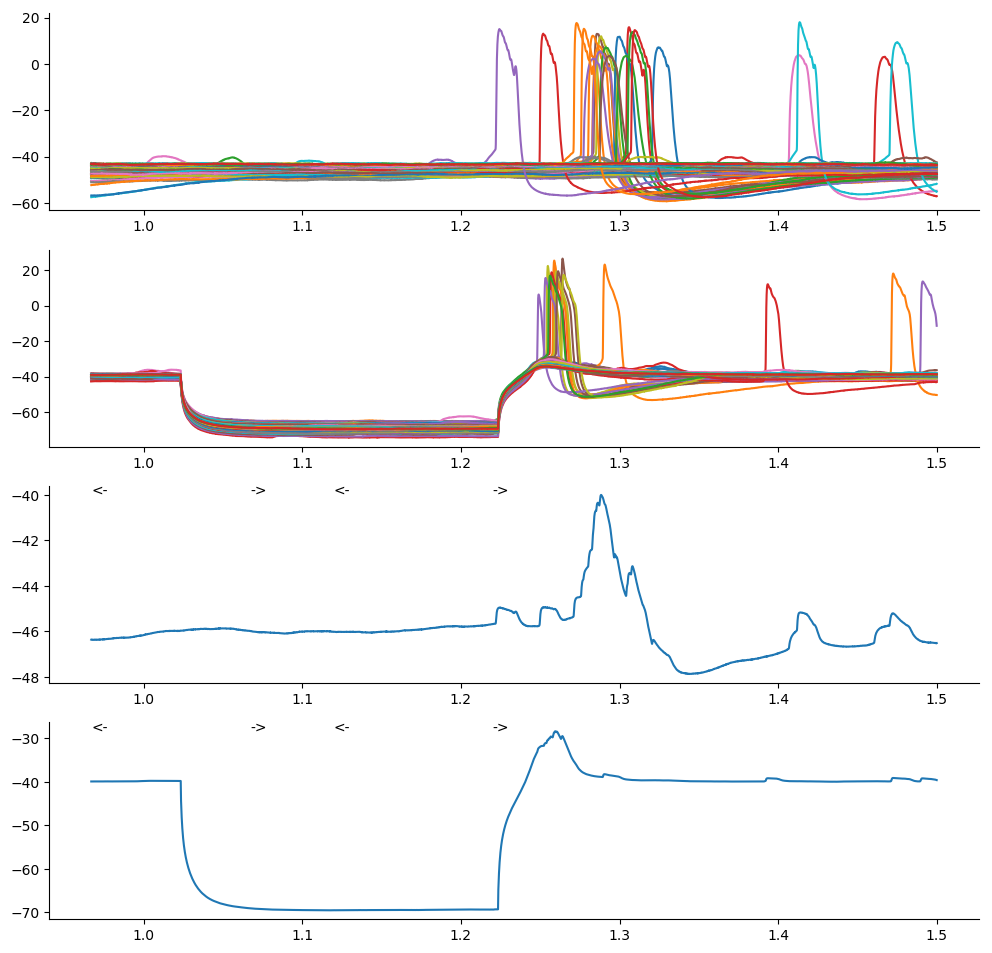

In [9]:
df1x = pd.DataFrame()
df1y = pd.DataFrame()
df2x = pd.DataFrame()
df2y = pd.DataFrame()
df_out2 = pd.DataFrame()


file_out = file_in.replace('.abf','') + '_2-1_.csv' 

i = 0
fig, ax = plt.subplots(4,1, figsize=(12, 12), dpi = 100)
for sweep in sweeps:
    if sweep in included2:
        
        abf.setSweep (sweepNumber = sweep, channel = 0)  
        x1 = abf.sweepX [base_start2:trace_end2]
        y1 = abf.sweepY [base_start2:trace_end2]
        df1x[sweep] = x1
        df1y[sweep] = y1
        
        ax[0].plot (x1, y1, linestyle = 'solid')
        abf.setSweep (sweepNumber = sweep, channel = 2) 
        x2 = abf.sweepX [base_start2:trace_end2]
        y2 = abf.sweepY [base_start2:trace_end2]
        df2x[sweep] = x2
        df2y[sweep] = y2
        ax[1].plot (x2, y2, linestyle = 'solid')

        i = i + 1
        
df_out2['x_rec'] = df1x.mean(axis=1)
df_out2['y_rec'] = df1y.mean(axis=1)
df_out2['x_stim'] = df2x.mean(axis=1)
df_out2['y_stim'] = df2y.mean(axis=1)

df_out2['vm_stim'] = df_out2.loc[base_start1:base_end1]['y_stim'].mean()
df_out2['vm_rec'] = df_out2.loc[base_start1:base_end1]['y_rec'].mean()
df_out2['vrec'] = df_out2.loc[hyp_start1:hyp_end1]['y_rec'].mean() - df_out2['vm_rec'] 
df_out2['vstim'] = df_out2.loc[hyp_start1:hyp_end1]['y_stim'].mean() - df_out2['vm_stim'] 
df_out2['istim'] = df_out['istim']
df_out2['p_cc'] = df_out2['vrec'] / df_out2['vstim'] * 100

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[2].plot (df_out2['x_stim'],df_out2['y_rec'], linestyle = 'solid')
ax[2].annotate('<-', xy=((base_start2/sf_s), max(df_out2['y_rec'])), color = 'black')
ax[2].annotate('->', xy=((base_end2/sf_s), max(df_out2['y_rec'])), color = 'black')
ax[2].annotate('<-', xy=((hyp_start2/sf_s), max(df_out2['y_rec'])), color = 'black')
ax[2].annotate('->', xy=((hyp_end2/sf_s), max(df_out2['y_rec'])), color = 'black')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

ax[3].plot (df_out2['x_rec'],df_out2['y_stim'], linestyle = 'solid')
ax[3].annotate('<-', xy=((base_start2/sf_s), max(df_out2['y_stim'])), color = 'black')
ax[3].annotate('->', xy=((base_end2/sf_s), max(df_out2['y_stim'])), color = 'black')
ax[3].annotate('<-', xy=((hyp_start2/sf_s), max(df_out2['y_stim'])), color = 'black')
ax[3].annotate('->', xy=((hyp_end2/sf_s), max(df_out2['y_stim'])), color = 'black')
ax[3].spines['right'].set_visible(False)
ax[3].spines['top'].set_visible(False)


try:
    os.stat(dir_out)
except:
    os.makedirs(dir_out)
    
# Write data to file
os.chdir(dir_out)
df_out2.to_csv(file_out, index = False)  

In [26]:
file_out = file_in.replace('.abf','') + '_2-1_summary.csv' 

df_summary = pd.DataFrame(df_out2.iloc[0][4:12])
df_summary = df_summary.reset_index()
df_summary.columns = ['measurement', 'mean']
df_summary = df_summary.transpose()
df_summary.columns = df_summary.iloc[0][:]
df_summary = df_summary[df_summary.index != 'measurement']



display(HTML(df_summary.to_html()))

try:
    os.stat(dir_out)
except:
    os.makedirs(dir_out)
    
# Write data to file
os.chdir(dir_out)
df_out2.to_csv(file_out, index = False)   

measurement,vm_stim,vm_rec,vrec,vstim,istim,p_cc
mean,-39.8397,-46.2078,0.45512,-26.2637,-201.608,-1.73289
